# Exercise 5
Dataset from Kaggle Competition : House Prices
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

---

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

Declare lists for Problem 3 to compare and contrast the 4 models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on both Train and Test Data

In [3]:
train_CA = []
train_TPR = []
train_FPR = []

test_CA = []
test_TPR = []
test_FPR = []

---
## Problem 1: Predicting CentralAir using SalePrice
Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
Use the following variables from the dataset in this problem : SalePrice and CentralAir

In [4]:
houseData = pd.read_csv('train.csv')
houseData.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
442,443,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162900
1194,1195,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,158000
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
953,954,60,RL,NaN,11075,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2008,WD,Normal,172000
709,710,20,RL,NaN,7162,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,109900


In [5]:
#SalePrice: Predictor
sp = pd.DataFrame(houseData['SalePrice'])

# CentralAir: Response
ca = pd.DataFrame(houseData['CentralAir'].astype('category'))

### a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

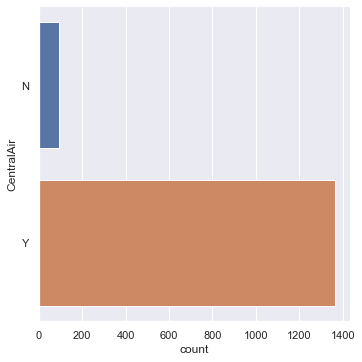

In [6]:
sb.catplot(data = ca, y = 'CentralAir', kind = 'count')

In [9]:
# Ratio
ca.value_counts(normalize=True)

CentralAir
Y             0.934932
N             0.065068
dtype: float64

### b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

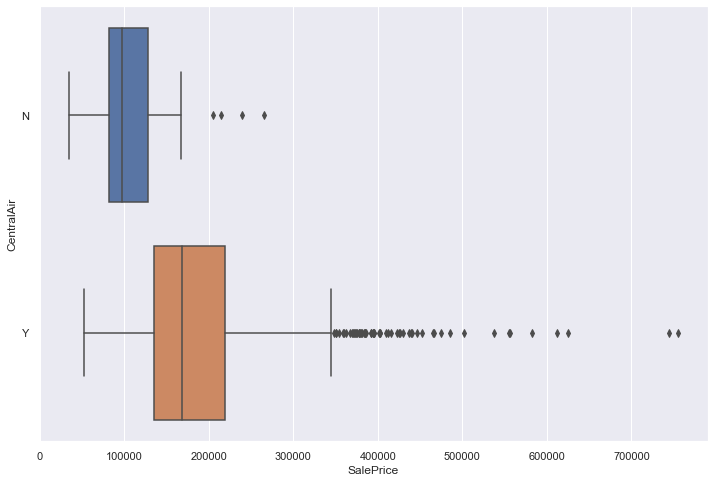

In [7]:
joint = pd.concat([sp, ca], axis=1)
f = plt.figure(figsize=(12,8))
sb.boxplot(data = joint, x = 'SalePrice', y = 'CentralAir')

### c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

# other useful functions
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

### d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(sp, ca, train_size=1100)

### e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

Standardise decision trees for all 4 models at at maximum depth of 3 for comparison.

In [10]:
dectree = DecisionTreeClassifier(max_depth=3) # create a decision tree object
dectree.fit(X_train, y_train)      # train the decision tree

DecisionTreeClassifier(max_depth=3)

### f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree


[Text(446.4, 570.7800000000001, 'SalePrice <= 107700.0\ngini = 0.119\nsamples = 1100\nvalue = [70, 1030]\nclass = Y'),
 Text(223.2, 407.70000000000005, 'SalePrice <= 61191.5\ngini = 0.457\nsamples = 113\nvalue = [40, 73]\nclass = Y'),
 Text(111.6, 244.62, 'SalePrice <= 46000.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = N'),
 Text(55.8, 81.53999999999996, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(167.39999999999998, 81.53999999999996, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = N'),
 Text(334.79999999999995, 244.62, 'SalePrice <= 105950.0\ngini = 0.428\nsamples = 103\nvalue = [32, 71]\nclass = Y'),
 Text(279.0, 81.53999999999996, 'gini = 0.407\nsamples = 95\nvalue = [27, 68]\nclass = Y'),
 Text(390.59999999999997, 81.53999999999996, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = N'),
 Text(669.5999999999999, 407.70000000000005, 'SalePrice <= 145250.0\ngini = 0.059\nsamples = 987\nvalue = [30, 957]\nclass = Y'),
 Text(558.0, 244.62, 'SalePrice <= 

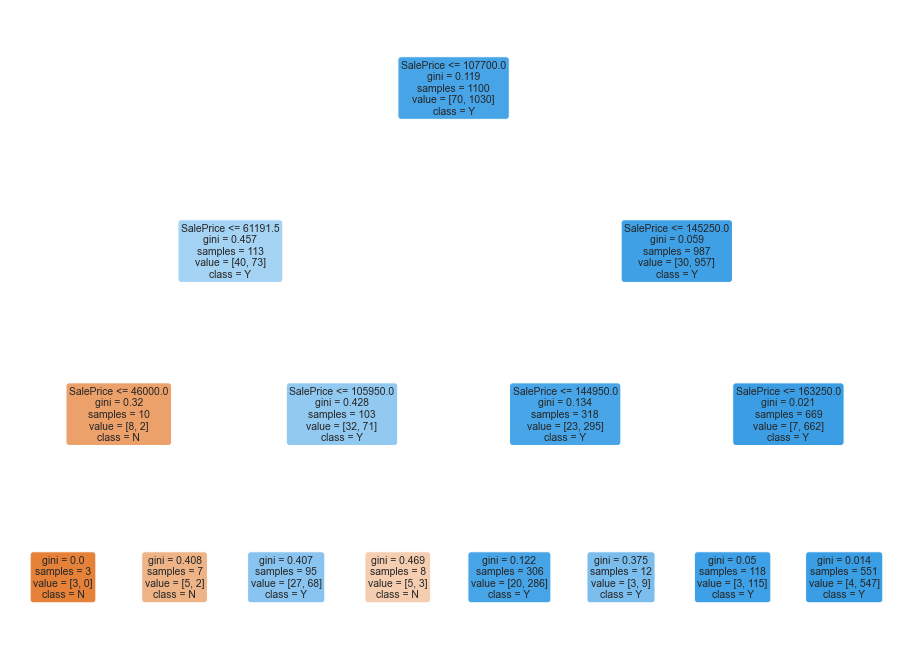

In [11]:
f = plt.figure(figsize=(16,12))
plot_tree(dectree, filled=True, rounded=True,\
         feature_names=['SalePrice'], class_names=['N', 'Y'])

### g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

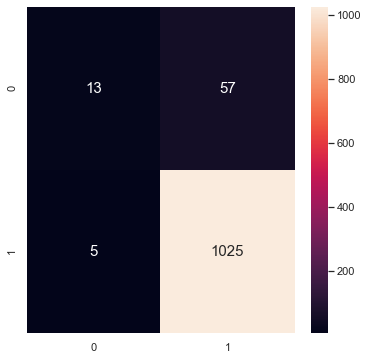

In [12]:
y_train_pred = dectree.predict(X_train)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), \
            annot=True, fmt='.0f', annot_kws={'size':15})

### h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [13]:
c_accuracy = dectree.score(X_train, y_train)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
train_CA.append(c_accuracy)
train_TPR.append(tp/(tp+fn))
train_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9436363636363636

True Positive Rate:	 0.9951456310679612
True Negative Rate:	 0.18571428571428572
False Positive Rate:	 0.8142857142857143
False Negative Rate:	 0.0048543689320388345


### i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

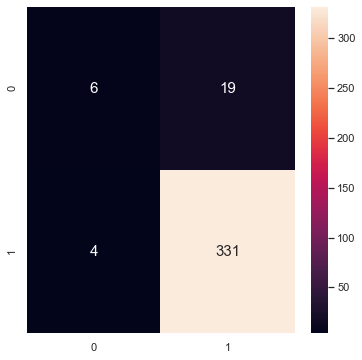

In [14]:
y_test_pred = dectree.predict(X_test)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_test, y_test_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

### j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [15]:
c_accuracy = dectree.score(X_test, y_test)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
test_CA.append(c_accuracy)
test_TPR.append(tp/(tp+fn))
test_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9361111111111111

True Positive Rate:	 0.9880597014925373
True Negative Rate:	 0.24
False Positive Rate:	 0.76
False Negative Rate:	 0.011940298507462687


---
## Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.

Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

---
## Problem 2.1: Predicting CentralAir using GrLivArea

In [16]:
# GrLivArea: Predictor
gla = pd.DataFrame(houseData['GrLivArea'])

#### Boxplot of CentralAir against GrLivArea to see the mutual relationship.

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

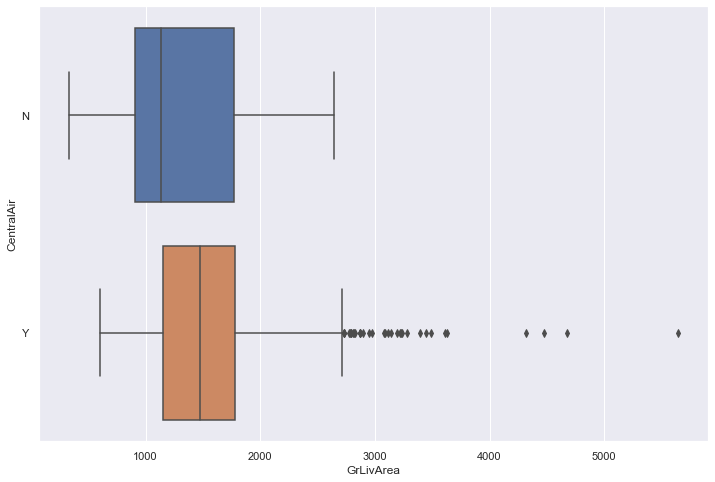

In [17]:
joint = pd.concat([gla, ca], axis=1)
f = plt.figure(figsize=(12,8))
sb.boxplot(data = joint, x = 'GrLivArea', y = 'CentralAir')

#### Decision Tree model on a randomly partitioned dataset.

[Text(334.79999999999995, 570.7800000000001, 'GrLivArea <= 562.5\ngini = 0.124\nsamples = 1100\nvalue = [73, 1027]\nclass = Y'),
 Text(223.2, 407.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(446.4, 407.70000000000005, 'GrLivArea <= 1056.5\ngini = 0.119\nsamples = 1097\nvalue = [70, 1027]\nclass = Y'),
 Text(223.2, 244.62, 'GrLivArea <= 806.5\ngini = 0.24\nsamples = 222\nvalue = [31, 191]\nclass = Y'),
 Text(111.6, 81.53999999999996, 'gini = 0.389\nsamples = 34\nvalue = [9, 25]\nclass = Y'),
 Text(334.79999999999995, 81.53999999999996, 'gini = 0.207\nsamples = 188\nvalue = [22, 166]\nclass = Y'),
 Text(669.5999999999999, 244.62, 'GrLivArea <= 1767.0\ngini = 0.085\nsamples = 875\nvalue = [39, 836]\nclass = Y'),
 Text(558.0, 81.53999999999996, 'gini = 0.063\nsamples = 587\nvalue = [19, 568]\nclass = Y'),
 Text(781.1999999999999, 81.53999999999996, 'gini = 0.129\nsamples = 288\nvalue = [20, 268]\nclass = Y')]

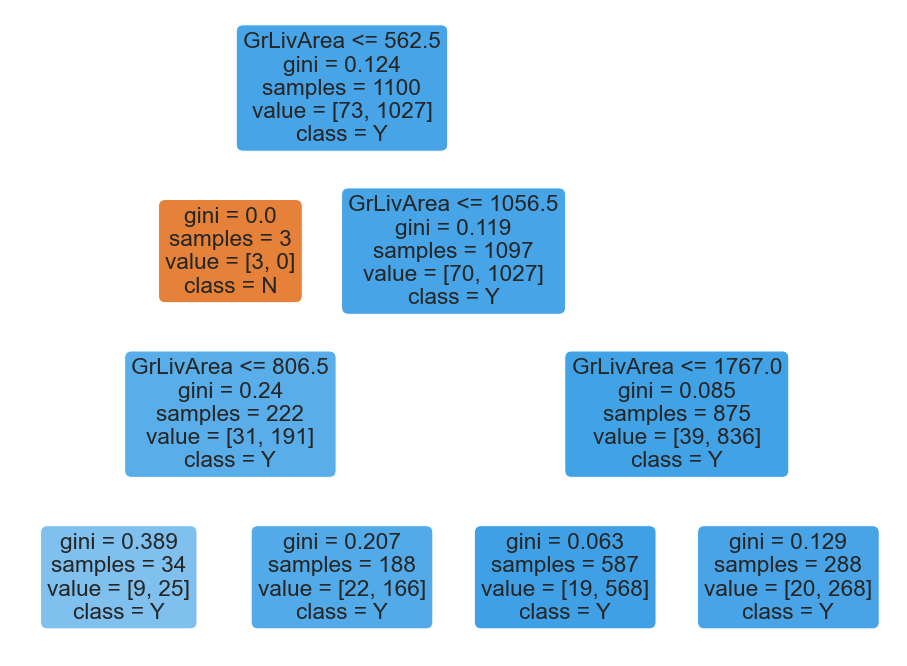

In [18]:
X_train, X_test, y_train, y_test = train_test_split(gla, ca, train_size=1100)

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(16,12))
plot_tree(dectree, filled=True, rounded=True, \
            feature_names=['GrLivArea'], class_names=['N', 'Y'])

#### Confusion Matrix for the train dataset.

<AxesSubplot:>

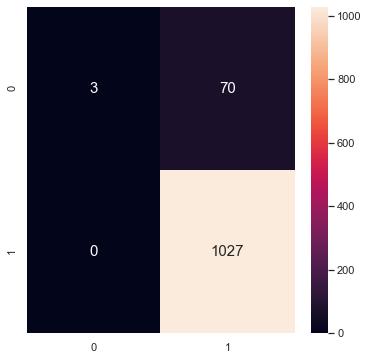

In [19]:
y_train_pred = dectree.predict(X_train)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the train dataset.

In [20]:
c_accuracy = dectree.score(X_train, y_train)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
train_CA.append(c_accuracy)
train_TPR.append(tp/(tp+fn))
train_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9363636363636364

True Positive Rate:	 1.0
True Negative Rate:	 0.0410958904109589
False Positive Rate:	 0.958904109589041
False Negative Rate:	 0.0


#### Confusion matrix for the test dataset.

<AxesSubplot:>

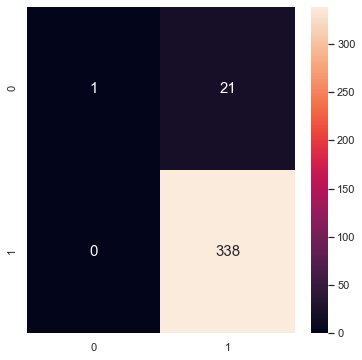

In [21]:
y_test_pred = dectree.predict(X_test)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_test, y_test_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the test dataset.

In [22]:
c_accuracy = dectree.score(X_test, y_test)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
test_CA.append(c_accuracy)
test_TPR.append(tp/(tp+fn))
test_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9416666666666667

True Positive Rate:	 1.0
True Negative Rate:	 0.045454545454545456
False Positive Rate:	 0.9545454545454546
False Negative Rate:	 0.0


---
## Problem 2.2: Predicting CentralAir using OverallQual

In [23]:
# OverallQual: Predictor
oq = pd.DataFrame(houseData['OverallQual'])

#### Boxplot of CentralAir against OverallQual to see the mutual relationship.

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

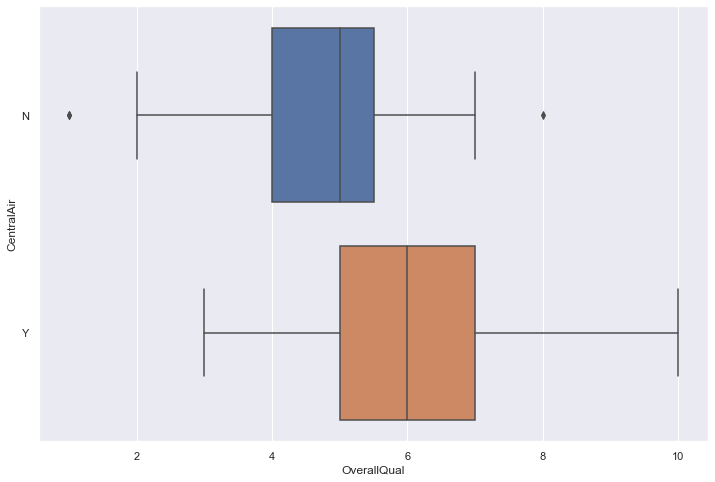

In [24]:
joint = pd.concat([oq, ca], axis=1)
f = plt.figure(figsize=(12,8))
sb.boxplot(data = joint, x = 'OverallQual', y = 'CentralAir')

#### Decision Tree model on a randomly partitioned dataset.

[Text(396.79999999999995, 570.7800000000001, 'OverallQual <= 3.5\ngini = 0.106\nsamples = 1100\nvalue = [62, 1038]\nclass = Y'),
 Text(198.39999999999998, 407.70000000000005, 'OverallQual <= 2.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = N'),
 Text(99.19999999999999, 244.62, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(297.59999999999997, 244.62, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]\nclass = N'),
 Text(595.1999999999999, 407.70000000000005, 'OverallQual <= 4.5\ngini = 0.086\nsamples = 1082\nvalue = [49, 1033]\nclass = Y'),
 Text(495.99999999999994, 244.62, 'gini = 0.304\nsamples = 91\nvalue = [17, 74]\nclass = Y'),
 Text(694.3999999999999, 244.62, 'OverallQual <= 5.5\ngini = 0.062\nsamples = 991\nvalue = [32, 959]\nclass = Y'),
 Text(595.1999999999999, 81.53999999999996, 'gini = 0.126\nsamples = 282\nvalue = [19, 263]\nclass = Y'),
 Text(793.5999999999999, 81.53999999999996, 'gini = 0.036\nsamples = 709\nvalue = [13, 696]\nclass = Y')]

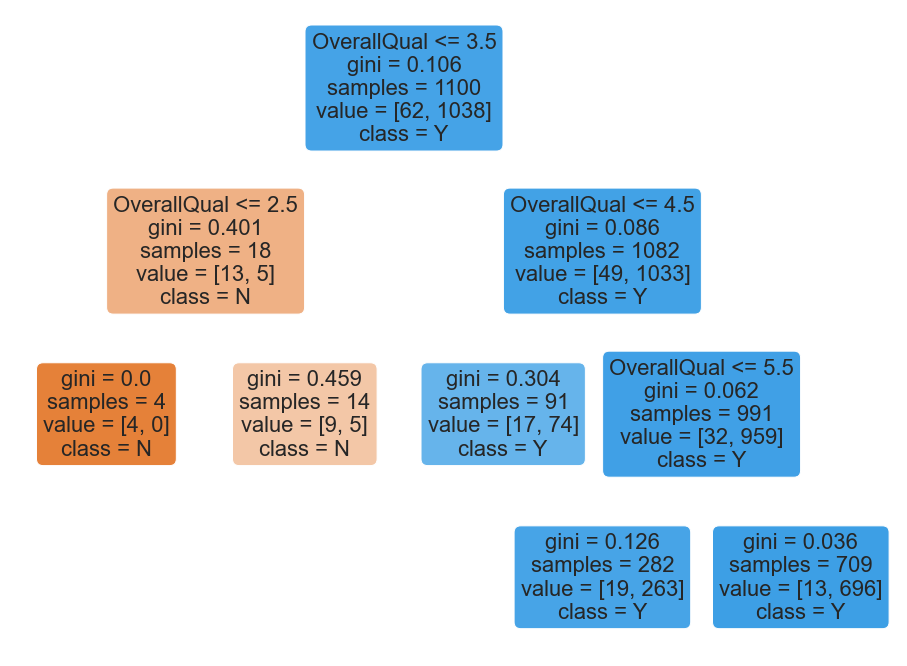

In [25]:
X_train, X_test, y_train, y_test = train_test_split(oq, ca, train_size=1100)

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(16,12))
plot_tree(dectree, filled=True, rounded=True, \
            feature_names=['OverallQual'], class_names=['N', 'Y'])

#### Confusion Matrix for the train dataset.

<AxesSubplot:>

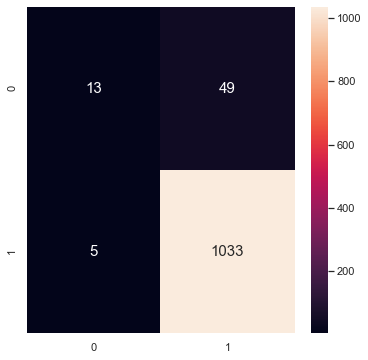

In [26]:
y_train_pred = dectree.predict(X_train)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the train dataset.

In [27]:
c_accuracy = dectree.score(X_train, y_train)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
train_CA.append(c_accuracy)
train_TPR.append(tp/(tp+fn))
train_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9509090909090909

True Positive Rate:	 0.9951830443159922
True Negative Rate:	 0.20967741935483872
False Positive Rate:	 0.7903225806451613
False Negative Rate:	 0.004816955684007707


#### Confusion matrix for the test dataset.

<AxesSubplot:>

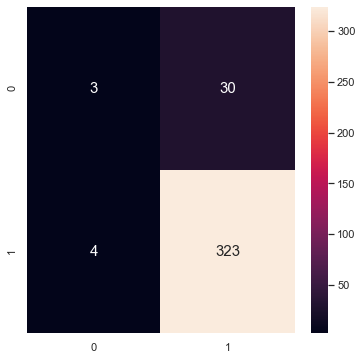

In [28]:
y_test_pred = dectree.predict(X_test)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_test, y_test_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the test dataset.

In [29]:
c_accuracy = dectree.score(X_test, y_test)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
test_CA.append(c_accuracy)
test_TPR.append(tp/(tp+fn))
test_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9055555555555556

True Positive Rate:	 0.9877675840978594
True Negative Rate:	 0.09090909090909091
False Positive Rate:	 0.9090909090909091
False Negative Rate:	 0.012232415902140673


---
## Problem 2.3: Predicting CentralAir using YearBuilt

In [30]:
# YearBuilt: Predictor
yb = pd.DataFrame(houseData['YearBuilt'])

#### Boxplot of CentralAir against GrLivArea to see the mutual relationship.

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

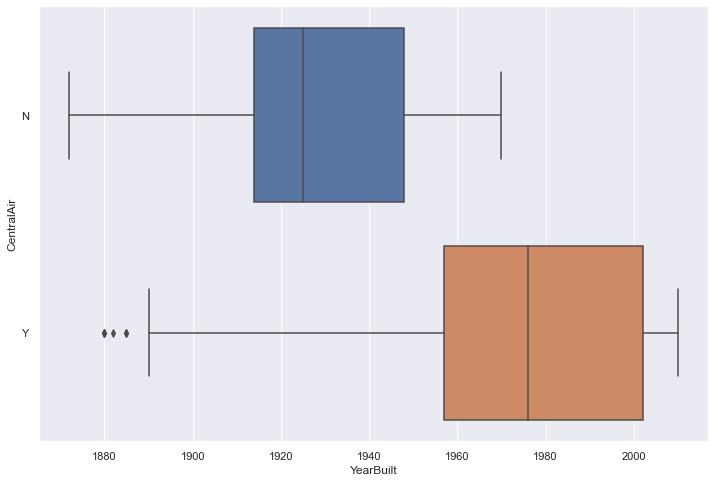

In [31]:
joint = pd.concat([yb, ca], axis=1)

f = plt.figure(figsize=(12,8))
sb.boxplot(data = joint, x = 'YearBuilt', y = 'CentralAir')

#### Decision Tree model on a randomly partitioned dataset.

[Text(515.0769230769231, 570.7800000000001, 'YearBuilt <= 1953.5\ngini = 0.121\nsamples = 1100\nvalue = [71, 1029]\nclass = Y'),
 Text(274.7076923076923, 407.70000000000005, 'YearBuilt <= 1917.5\ngini = 0.343\nsamples = 278\nvalue = [61, 217]\nclass = Y'),
 Text(137.35384615384615, 244.62, 'YearBuilt <= 1909.0\ngini = 0.466\nsamples = 65\nvalue = [24, 41]\nclass = Y'),
 Text(68.67692307692307, 81.53999999999996, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = Y'),
 Text(206.03076923076924, 81.53999999999996, 'gini = 0.49\nsamples = 42\nvalue = [18, 24]\nclass = Y'),
 Text(412.0615384615385, 244.62, 'YearBuilt <= 1948.5\ngini = 0.287\nsamples = 213\nvalue = [37, 176]\nclass = Y'),
 Text(343.38461538461536, 81.53999999999996, 'gini = 0.262\nsamples = 174\nvalue = [27, 147]\nclass = Y'),
 Text(480.73846153846154, 81.53999999999996, 'gini = 0.381\nsamples = 39\nvalue = [10, 29]\nclass = Y'),
 Text(755.4461538461538, 407.70000000000005, 'YearBuilt <= 1970.5\ngini = 0.024\nsamples = 82

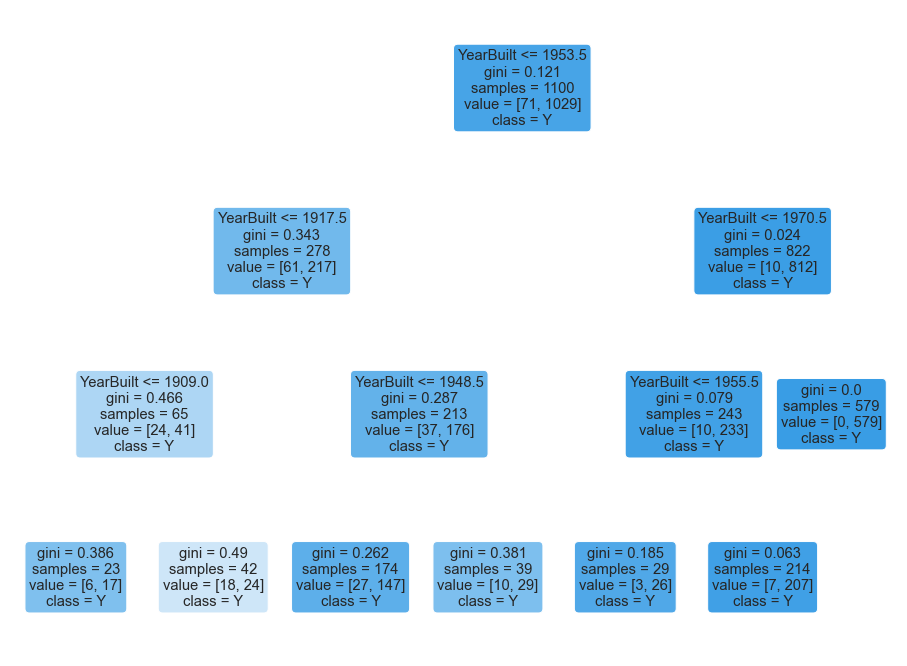

In [33]:
X_train, X_test, y_train, y_test = train_test_split(yb, ca, train_size=1100)

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

f = plt.figure(figsize=(16,12))
plot_tree(dectree, filled=True, rounded=True, \
            feature_names=['YearBuilt'], class_names=['N', 'Y'])

#### Confusion Matrix for the train dataset.

<AxesSubplot:>

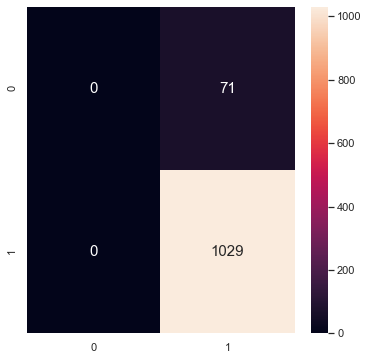

In [34]:
y_train_pred = dectree.predict(X_train)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the train dataset.

In [35]:
c_accuracy = dectree.score(X_train, y_train)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
train_CA.append(c_accuracy)
train_TPR.append(tp/(tp+fn))
train_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9354545454545454

True Positive Rate:	 1.0
True Negative Rate:	 0.0
False Positive Rate:	 1.0
False Negative Rate:	 0.0


#### Confusion matrix for the test dataset.

<AxesSubplot:>

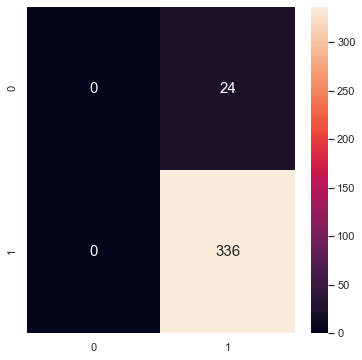

In [36]:
y_test_pred = dectree.predict(X_test)

f = plt.figure(figsize=(6,6))
sb.heatmap(confusion_matrix(y_test, y_test_pred), \
            annot=True, fmt='.0f', annot_kws={"size":15})

#### Accuracy measures based on the test dataset.

In [37]:
c_accuracy = dectree.score(X_test, y_test)
print("Classification Accuracy:\t", c_accuracy, end='\n\n')

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print("True Positive Rate:\t", tp/(tp+fn))
print("True Negative Rate:\t", tn/(tn+fp))
print("False Positive Rate:\t", fp/(tn+fp))
print("False Negative Rate:\t", fn/(tp+fn))

# Store values for Problem 3
test_CA.append(c_accuracy)
test_TPR.append(tp/(tp+fn))
test_FPR.append(fp/(tn+fp))

Classification Accuracy:	 0.9333333333333333

True Positive Rate:	 1.0
True Negative Rate:	 0.0
False Positive Rate:	 1.0
False Negative Rate:	 0.0


---
## Problem 3: Best Uni-Variate Model to Predict CentralAir

Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on
both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

In [42]:
variables = ["SalePrice", "GrLivArea", "OverallQual", "YearBuilt"]

print("  - Train Dataset -")
for i in range(4):
    print(variables[i])
    print("\tClassification Accuracy:", train_CA[i])
    print("\tTrue Positive Rate:\t", train_TPR[i])
    print("\tFalse Positive Rate:\t", train_FPR[i])

print("\n")
print("  - Test Dataset -")
for i in range(4):
    print(variables[i])
    print("\tClassification Accuracy:", test_CA[i])
    print("\tTrue Positive Rate:\t", test_TPR[i])
    print("\tFalse Positive Rate:\t", test_FPR[i])

  - Train Dataset -
SalePrice
	Classification Accuracy: 0.9436363636363636
	True Positive Rate:	 0.9951456310679612
	False Positive Rate:	 0.8142857142857143
GrLivArea
	Classification Accuracy: 0.9363636363636364
	True Positive Rate:	 1.0
	False Positive Rate:	 0.958904109589041
OverallQual
	Classification Accuracy: 0.9509090909090909
	True Positive Rate:	 0.9951830443159922
	False Positive Rate:	 0.7903225806451613
YearBuilt
	Classification Accuracy: 0.9354545454545454
	True Positive Rate:	 1.0
	False Positive Rate:	 1.0


  - Test Dataset -
SalePrice
	Classification Accuracy: 0.9361111111111111
	True Positive Rate:	 0.9880597014925373
	False Positive Rate:	 0.76
GrLivArea
	Classification Accuracy: 0.9416666666666667
	True Positive Rate:	 1.0
	False Positive Rate:	 0.9545454545454546
OverallQual
	Classification Accuracy: 0.9055555555555556
	True Positive Rate:	 0.9877675840978594
	False Positive Rate:	 0.9090909090909091
YearBuilt
	Classification Accuracy: 0.9333333333333333
	True Pos

#### Comparison parameters:
- Classification Accuracy: the higher, the better
- True Positive Rate: the higher, the better
- False Positive Rate: the lower, the better

> On both train and test datasets, all variables have very high True Positive Rates. GrLivArea and YearBuilt both have True Positive Rates at the highest level of 1.0, however, their False Positive Rates are very high. YearBuilt has False Positive Rates of 1.0 while GrLivArea has False Positive Rates of over 0.95. They also have lower Classification Accuracies from the train dataset as compared to the other 2 variables (SalePrice & OverallQual).

> For the train dataset, SalePrice & OverallQual both have quite high Classification Accuracies and True Positive Rates. False Positive Rates are also very high, but not as near 1.0 as GrLivArea & YearBuilt.

> For the test dataset, SalePrice has a higher Classification Accuracy and True Positive Rate than OverallQual, while also having a lower False Positive Rate.

Hence, SalePrice could be identified as the marginally-better predictor for "CentralAir" compared to the other 3 variables.